In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pyaxions import jaxions as pa
import importlib

In [2]:
from matplotlib.animation import FuncAnimation

In [166]:
# Some Maxion useful definitions
def npi(x):
    return np.mod(x+np.pi,2*np.pi)-np.pi
# axion cmap
thcmap = pa.mkcmap2(['w','r','k','b2','w'])
# colorbars
def colorbar(mappable):
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    import matplotlib.pyplot as plt
    last_axes = plt.gca()
    ax = mappable.axes
    fig = ax.figure
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = fig.colorbar(mappable, cax=cax)
    plt.sca(last_axes)
    return cbar
def smoothlog(ct,all_std,order=1):
    z = np.polyfit(np.log(ct), np.log(all_std), order)
    p = np.poly1d(z)
    lct = np.log(ct)
    return np.exp(p(lct))

# Moore movie

In [109]:
mf = pa.findmfiles('out')
print(mf[0],mf[-9])
len(mf[0:-9])
mf = mf[:-9]

out/axion.m.00002 out/axion.m.00384


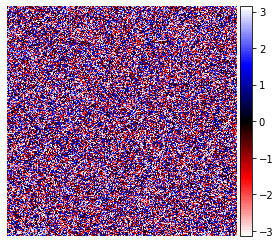

In [112]:
# Some global variables to define the whole run
total_number_of_frames = len(mf)
# Theta from -pi tp pi
all_data = npi(pa.gml(mf,'slice//m'))
# time with 3 dig. precision
all_ct = ['%.3f'%a for a in pa.gml(mf,'ct')]
# zip all 
all_d = [[ct,im] for ct,im in zip(all_ct,all_data)]

def animate(frame):
    """
    Animation function. Takes the current frame number (to select the potion of
    data to plot) and a line object to update.
    """
    global mf, image, t0

    image.set_array(all_d[frame][1])
    t0.set_text(r'$\tau = $'+all_d[frame][0])
    # This comma is necessary!
    return (image,t0)


# Now we can do the plotting!
fig, ax = plt.subplots(1, figsize=(4, 4))
# Remove a bunch of stuff to make sure we only 'see' the actual imshow
# Stretch to fit the whole plane
fig.subplots_adjust(0, 0, 1, 1)
# Remove bounding line
ax.axis("off")

# Initialise our plot. Make sure you set vmin and vmax! 
# interpolation='spline16' produces domainwalls
image = ax.imshow(all_d[0][1], origin='bottom',  cmap=thcmap, vmin=-np.pi, vmax=np.pi)
t0    = ax.text(1,1,r'$\tau = $'+all_d[0][0],color='w',fontsize=8)
 
# fig.colorbar(image,ax=ax)
colorbar(image)

fig.tight_layout(h_pad=1)

animation = FuncAnimation(
    # Your Matplotlib Figure object
    fig,
    # The function that does the updating of the Figure
    animate,
    # Frame information (here just frame number)
    np.arange(total_number_of_frames),
    # Extra arguments to the animate function
    fargs=[],
    # Frame-time in ms; i.e. for a given frame-rate x, 1000/x
    interval=1000 / 25
)

# Try to set the DPI to the actual number of pixels you're plotting
# animation.save("./out_Mheta.mp4", dpi=256)
animation.save("./out_Mheta.mp4", dpi=256)

# Theta movie

In [172]:
mf = pa.findmfiles('cout')
print(mf[0],mf[-1])

Excluded corrupted file in cout/: cout/m/axion.m.00240
cout/m/axion.m.00000 cout/m/axion.m.00239


In [173]:
# Some global variables to define the whole run
total_number_of_frames = len(mf)
# Theta data
all_data = pa.gml(mf,'slice//map/m')/pa.gml(mf,'R')[:,np.newaxis,np.newaxis]
# max-min-normalisation

In [174]:
all_std = (pa.gml(mf,'da//map/m/data')/pa.gml(mf,'R')[:,np.newaxis]).std(axis=1)
ct = pa.gml(mf,'ct')
all_std2 = smoothlog(ct,all_std,2)

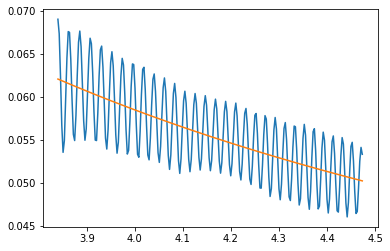

In [175]:
# all_std2 = np.exp(savgol_filter(np.log(all_std), window_length = 11, polyorder = 1))
plt.plot(pa.gml(mf,'ct'),all_std)
plt.plot(pa.gml(mf,'ct'),all_std2)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:44: MatplotlibDeprecationWarning: 
The set_clim function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.set_clim instead.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: 
The set_clim function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.set_clim instead.


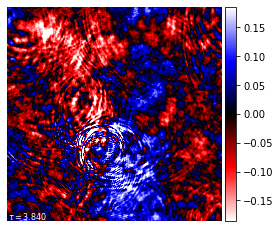

In [177]:
# Some global variables to define the whole run
total_number_of_frames = len(mf)
#time 
ct = pa.gml(mf,'ct')
all_ct = ['%.3f'%a for a in pa.gml(mf,'ct')]
# Theta data
all_data = pa.gml(mf,'slice//map/m')/pa.gml(mf,'R')[:,np.newaxis,np.newaxis]
# max-min-normalisation
all_std = (pa.gml(mf,'da//map/m/data')/pa.gml(mf,'R')[:,np.newaxis]).std(axis=1)
all_std = 3*smoothlog(ct,all_std)
# zip it all 
all_d = [[ct,st,im] for ct,st,im in zip(all_ct,all_std,all_data)]

def animate(frame):
    """
    Animation function. Takes the current frame number (to select the potion of
    data to plot) and a line object to update.
    """
    global mf, image, t0
    ct,st,im = all_d[frame]
    image.set_array(im)
    image.set_clim(vmin=-st,vmax=st)
    t0.set_text(r'$\tau = $'+ct)
    cb.set_clim(-st,st)
    # This comma is necessary!
    return (image,t0,cb)


# Now we can do the plotting!
fig, ax = plt.subplots(1, figsize=(4, 4))
# Remove a bunch of stuff to make sure we only 'see' the actual imshow
# Stretch to fit the whole plane
fig.subplots_adjust(0, 0, 1, 1)
# Remove bounding line
ax.axis("off")


# Initialise our plot. Make sure you set vmin and vmax!
image = ax.imshow(all_d[0][2], origin='bottom', interpolation='spline16', cmap=thcmap, vmin=-all_d[0][1], vmax=all_d[0][1])
t0    = ax.text(1,1,r'$\tau = $'+all_d[0][0],color='w',fontsize=8)
 
# fig.colorbar(image,ax=ax)
cb    = colorbar(image)
cb.set_clim(-all_d[0][1],all_d[0][1])
fig.tight_layout(h_pad=1)

animation = FuncAnimation(
    # Your Matplotlib Figure object
    fig,
    # The function that does the updating of the Figure
    animate,
    # Frame information (here just frame number)
    np.arange(total_number_of_frames),
    # Extra arguments to the animate function
    fargs=[],
    # Frame-time in ms; i.e. for a given frame-rate x, 1000/x
    interval=1000 / 25
)

# Try to set the DPI to the actual number of pixels you're plotting
# animation.save("./out_Mheta.mp4", dpi=256)
animation.save("./out_theta.mp4", dpi=256)

# Projection map movie

In [197]:
mf = pa.findmfiles('cout')
print(mf[0],mf[-1])

cout/m/axion.m.00000 cout/m/axion.m.00136


In [205]:
# Some global variables to define the whole run
total_number_of_frames = len(mf)
# Normalise projection data to energy
all_data = np.log10(pa.gml(mf,'slice//map/P')/pa.gml(mf,'eA')[:,np.newaxis,np.newaxis])
# max-min-normalisation

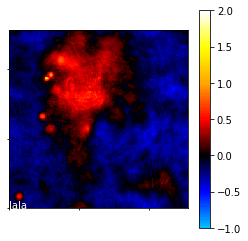

In [231]:
Pmap = pa.mkcmap2(['b4','b2','k','r','o','y','w'])

fig, ax = plt.subplots(1,figsize=(4,4))
plt.imshow(all_data[0],vmin=-1,vmax=2,cmap=Pmap,extent=[0,pa.gm(mf[0],'L'),0,pa.gm(mf[0],'L')])
ax.tick_params(axis=u'both', which=u'both',length=2)
ax.set_xticks(np.arange(0,pa.gm(mf[0],'L'),1))
ax.set_yticks(np.arange(0,pa.gm(mf[0],'L'),1))
ax.set_xticklabels([]);ax.set_yticklabels([])
ax.text(0,0,"lala",color='w')
plt.colorbar()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:42: MatplotlibDeprecationWarning: 
The set_clim function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.set_clim instead.


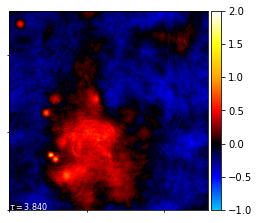

In [227]:
# Some global variables to define the whole run
total_number_of_frames = len(mf)
#time 
ct = pa.gml(mf,'ct')
all_ct = ['%.3f'%a for a in pa.gml(mf,'ct')]
# Normalise projection data to energy
all_data = np.log10(pa.gml(mf,'slice//map/P')/pa.gml(mf,'eA')[:,np.newaxis,np.newaxis])
# zip it all 
all_d = [[ct,im] for ct,im in zip(all_ct,all_data)]

def animate(frame):
    """
    Animation function. Takes the current frame number (to select the potion of
    data to plot) and a line object to update.
    """
    global mf, image, t0
    ct,im = all_d[frame]
    image.set_array(im)
    t0.set_text(r'$\tau = $'+ct)
    # This comma is necessary!
    return (image,t0)


# Now we can do the plotting!
fig, ax = plt.subplots(1, figsize=(4, 4))
# Remove a bunch of stuff to make sure we only 'see' the actual imshow
# Stretch to fit the whole plane
fig.subplots_adjust(0, 0, 1, 1)

# Remove bounding line
# ax.axis("off")

# axis 
L = pa.gm(mf[0],'L')
extent=[0,L,0,L]

# Initialise our plot. Make sure you set vmin and vmax!
image = ax.imshow(all_d[0][1], origin='bottom', interpolation='spline16', cmap=Pmap, vmin=-1, vmax=2, extent=extent)
t0    = ax.text(0,0,r'$\tau = $'+all_d[0][0],color='w',fontsize=8)
 # fig.colorbar(image,ax=ax)
cb    = colorbar(image)
cb.set_clim(-1,2)
fig.tight_layout(h_pad=1)

# ticks
ax.tick_params(axis=u'both', which=u'both',length=2)
ax.set_xticks(np.arange(0,pa.gm(mf[0],'L'),1))
ax.set_yticks(np.arange(0,pa.gm(mf[0],'L'),1))
ax.set_xticklabels([]);ax.set_yticklabels([])



animation = FuncAnimation(
    # Your Matplotlib Figure object
    fig,
    # The function that does the updating of the Figure
    animate,
    # Frame information (here just frame number)
    np.arange(total_number_of_frames),
    # Extra arguments to the animate function
    fargs=[],
    # Frame-time in ms; i.e. for a given frame-rate x, 1000/x
    interval=1000 / 25
)

# Try to set the DPI to the actual number of pixels you're plotting
# animation.save("./out_Mheta.mp4", dpi=256)
animation.save("./out_Pheta.mp4", dpi=256)